In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from scipy.stats import zscore
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.utils import resample
from sklearn.svm import SVC

%matplotlib inline

drive.mount('/content/drive')

Mounted at /content/drive


#Part 1

##Part 1.1

###Part 1. 1 a - Read all the 3 CSV files as DataFrame and store them into 3 separate variables.

In [ ]:
normal = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Supervised Learning Project/Normal.csv')
typeh = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Supervised Learning Project/Type_H.csv')
types = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Supervised Learning Project/Type_S.csv')

###Part 1.1 b - Print Shape and columns of all the 3 DataFrames

In [ ]:
print('Shape of Normal Dataframe is',normal.shape)
print('--------------------------------------------------------------')
print('Columns data of Normal Dataframe is as follows')
normal.head()

Shape of Normal Dataframe is (100, 7)
--------------------------------------------------------------
Columns data of Normal Dataframe is as follows


,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [ ]:
print('Shape of Type H Dataframe is',typeh.shape)
print('--------------------------------------------------------------')
print('Columns data of Type H Dataframe is as follows')
typeh.head()

Shape of Type H Dataframe is (60, 7)
--------------------------------------------------------------
Columns data of Type H Dataframe is as follows


,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H


In [ ]:
print('Shape of Type S Dataframe is',types.shape)
print('--------------------------------------------------------------')
print('Columns data of Type S Dataframe is as follows')
types.head()

Shape of Type S Dataframe is (150, 7)
--------------------------------------------------------------
Columns data of Type S Dataframe is as follows


,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Type_S


###Part 1.1 c - Compare Column names of all the 3 DataFrames and clearly write observations

1. All the dataframe has the same coulmns
2. 'Class' column can be used to group the data since each data frame has more or less same values in the class coulmn

###Part 1.1 d - Print DataTypes of all the 3 DataFrames.


In [ ]:
normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  100 non-null    float64
 1   P_tilt       100 non-null    float64
 2   L_angle      100 non-null    float64
 3   S_slope      100 non-null    float64
 4   P_radius     100 non-null    float64
 5   S_Degree     100 non-null    float64
 6   Class        100 non-null    object 
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


In [ ]:
typeh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  60 non-null     float64
 1   P_tilt       60 non-null     float64
 2   L_angle      60 non-null     float64
 3   S_slope      60 non-null     float64
 4   P_radius     60 non-null     float64
 5   S_Degree     60 non-null     float64
 6   Class        60 non-null     object 
dtypes: float64(6), object(1)
memory usage: 3.4+ KB


In [ ]:
types.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  150 non-null    float64
 1   P_tilt       150 non-null    float64
 2   L_angle      150 non-null    float64
 3   S_slope      150 non-null    float64
 4   P_radius     150 non-null    float64
 5   S_Degree     150 non-null    float64
 6   Class        150 non-null    object 
dtypes: float64(6), object(1)
memory usage: 8.3+ KB


###Part 1.1 e - Observe and share variation in ‘Class’ feature of all the 3 DaraFrames 

In [ ]:
normal['Class'].value_counts() 

Normal    73
Nrmal     27
Name: Class, dtype: int64

In [ ]:
typeh['Class'].value_counts() 

Type_H    37
type_h    23
Name: Class, dtype: int64

In [ ]:
types['Class'].value_counts() 

Type_S    133
tp_s       17
Name: Class, dtype: int64

Each dataframe has 2 values in the class coulmn which can be combined as single and use for the downstream operation  

##Part 1.2

###Part 1.2 a - Unify all the variations in ‘Class’ feature for all the 3 DataFrames

In [ ]:
normal = normal.replace(to_replace="Nrmal",value="Normal")
normal.Class.value_counts() 

Normal    100
Name: Class, dtype: int64

In [ ]:
typeh = typeh.replace(to_replace="type_h",value="Type_H")
typeh.Class.value_counts() 

Type_H    60
Name: Class, dtype: int64

In [ ]:
types = types.replace(to_replace="tp_s",value="Type_S")
types.Class.value_counts() 

Type_S    150
Name: Class, dtype: int64

###Part 1.2 b - Combine all the 3 DataFrames to form a single DataFrame 

In [ ]:
frames = [normal, typeh,types]
df = pd.concat(frames)
display(df)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal
...,...,...,...,...,...,...,...
145,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Type_S
146,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,Type_S
147,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Type_S
148,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Type_S


###Part 1.2 c - Print 5 random samples of this DataFrame

In [ ]:
df.sample(n=5)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
26,61.821627,13.597105,64.000000,48.224523,121.779803,1.296191,Normal
69,48.801909,18.017762,52.000000,30.784147,139.150407,10.442862,Normal
73,81.754419,20.123466,70.560440,61.630954,119.425086,55.506889,Type_S
9,58.599529,-0.261499,51.500000,58.861028,102.042812,28.059697,Type_S
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H


###Part 1.2 d - Print Feature-wise percentage of Null values

In [ ]:
df.isna().sum() / len(df)

P_incidence    0.0
P_tilt         0.0
L_angle        0.0
S_slope        0.0
P_radius       0.0
S_Degree       0.0
Class          0.0
dtype: float64

No coulmn has missing value

###Part 1.2 e - Check 5-point summary of the new DataFrame

In [ ]:
df.describe(include='all')

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310
unique,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,Type_S
freq,NaN,NaN,NaN,NaN,NaN,NaN,150
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,NaN
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,NaN
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,NaN
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,NaN
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,NaN
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,NaN


##Part 1.3

###Part 1.3 a - Visualize a heatmap to understand correlation between all features 

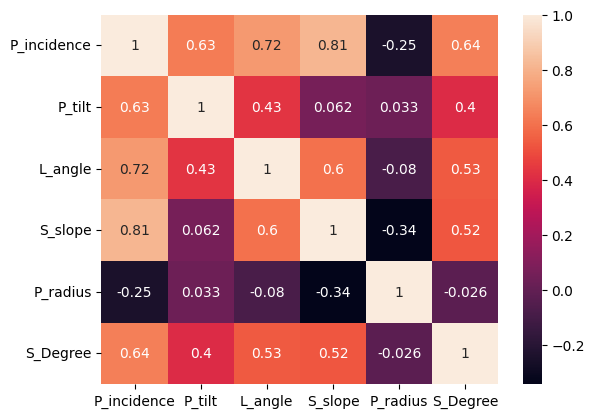

In [ ]:
sns.heatmap(data = df[['P_incidence','P_tilt','L_angle','S_slope','P_radius','S_Degree']].corr(), annot=True,cbar=True);

###Part 1.3 b - Share insights on correlation 

1. P_incidence and S_slope is positively co-realted
2. P_incidence and L_angle is also positevely co-related
3. P_incidence and S_degree is also moderatly co-related
4. P_incidence and P_radius is negatively co-related
5. S_slope and P_radius is negatively co-realted

###Part 1.3 c - Visualize a pairplot with 3 classes distinguished by colors and share insights 

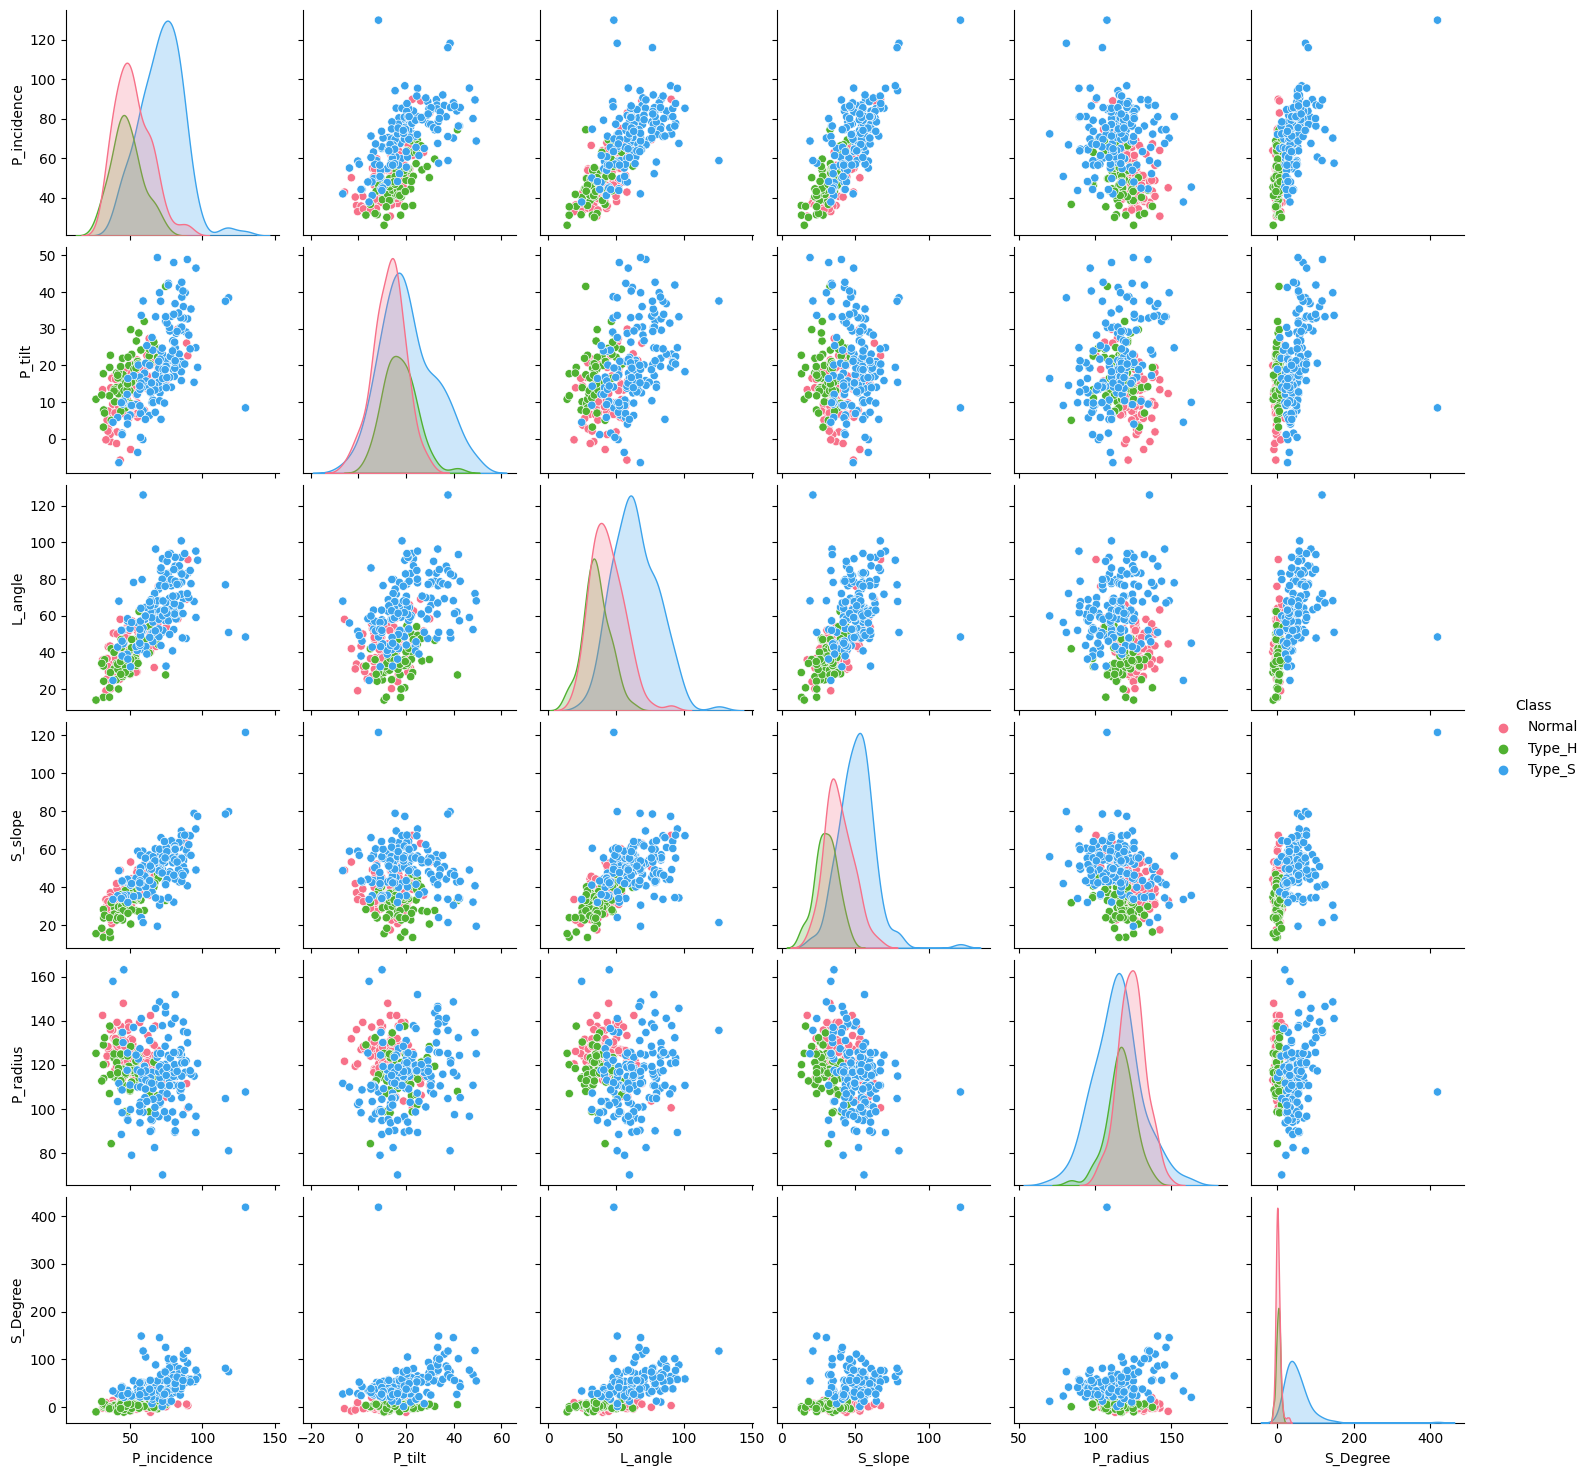

In [ ]:
sns.pairplot(data=df, vars=['P_incidence','P_tilt','L_angle','S_slope','P_radius','S_Degree'],hue='Class' ,palette='husl');

S_Degree looks not corelated to any of the other parameters.

###Part 1.3 d - Visualize a jointplot for ‘P_incidence’ and ‘S_slope’ and share insights 

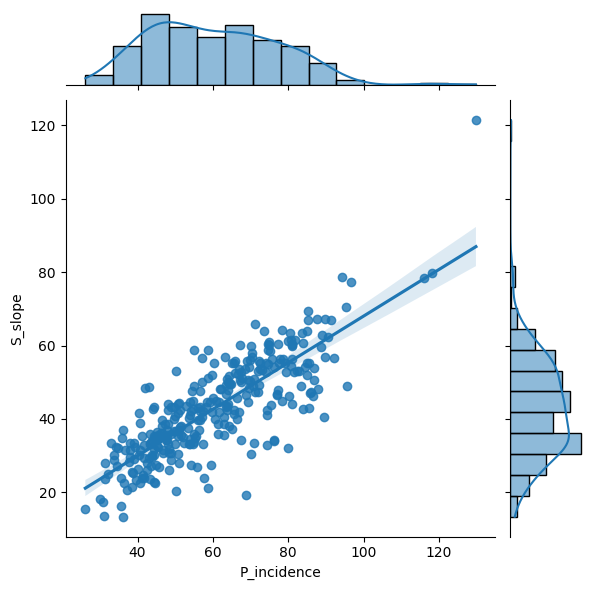

In [ ]:
sns.jointplot(data=df, x='P_incidence',y='S_slope',kind='reg');

1. P_incidence and S_slope is highly positevely corelated
2. Both the parameter almost looks normally distributed and right skewed that mean the skew is started as the both the parameter start toward the higher values
3. The skeweness is caused by the outliners

###Part 1.3 e - Visualize a boxplot to check distribution of the features and share insights.

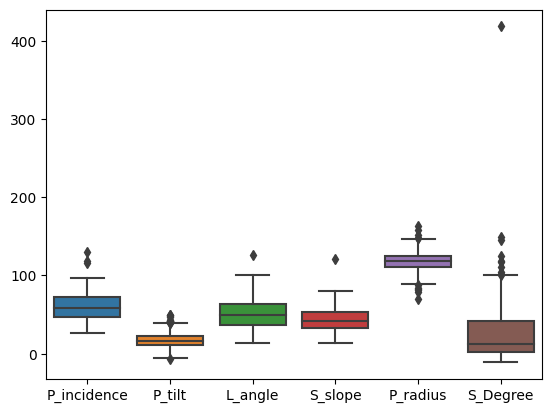

In [ ]:
sns.boxplot(data=df);

1. S_degree has more outliers followed by the P_radius and P_tilt

##Part 1.4

###Part 1.4 a - Split data into X and Y

In [ ]:
x = df.drop(['Class'],axis=1)
y = df['Class']

###Part 1.4 b - Split data into train and test with 80:20 proportion 

In [ ]:
x_scaled=x.apply(zscore)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=1)

###Part 1.4 c - Train a Supervised Learning Classification base model using KNN classifier

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=5,weights='distance')
KNN.fit(x_train,y_train)

KNeighborsClassifier(weights='distance')

###Part 1.4 d - Print all the possible performance metrics for both train and test data 

In [ ]:
predicted_lables = KNN.predict(x_test)
KNN.score(x_test,y_test)

0.8548387096774194

In [ ]:
cm = metrics.confusion_matrix(y_test,predicted_lables,labels = ['Normal','Type_H','Type_S'])
cm

array([[16,  1,  1],
       [ 4,  7,  0],
       [ 2,  1, 30]])

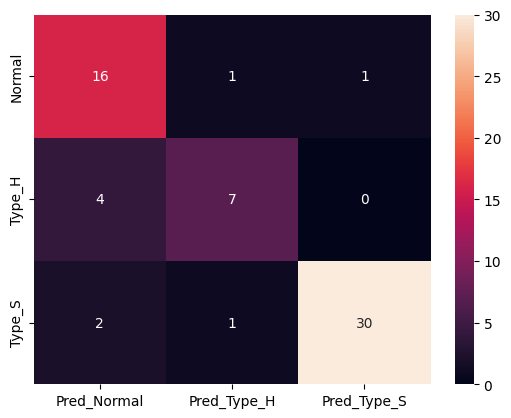

In [ ]:
df_cm = pd.DataFrame(cm,index = [ i for i in ['Normal','Type_H','Type_S']],columns=[ i for i in ['Pred_Normal','Pred_Type_H','Pred_Type_S']])
sns.heatmap(df_cm,annot=True);

In [ ]:
report = classification_report(y_test, predicted_lables)
print(report)

              precision    recall  f1-score   support

      Normal       0.73      0.89      0.80        18
      Type_H       0.78      0.64      0.70        11
      Type_S       0.97      0.91      0.94        33

    accuracy                           0.85        62
   macro avg       0.82      0.81      0.81        62
weighted avg       0.86      0.85      0.86        62



##Part 1.5

###Part 1.5 a - Experiment with various parameters to improve performance of the base model 

#Part 2

##Part 2.1

###Part 2.1 a - Read both the Datasets ‘Data1’ and ‘Data 2’ as DataFrame and store them into two separate variables


In [ ]:
data1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Supervised Learning Project/Data1.csv')
data2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Supervised Learning Project/Data2.csv')

###Part 2.1 b - Print shape and Column Names and DataTypes of both the Dataframes.

In [ ]:
print('Shape of Data1 is',data1.shape)
print('--------------------------------------------------------------')
print('Columns of Data1 is as follows')
data1.head()

Shape of Data1 is (5000, 8)
--------------------------------------------------------------
Columns of Data1 is as follows


,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [ ]:
print('Shape of Data2 is',data2.shape)
print('--------------------------------------------------------------')
print('Columns of Data2 is as follows')
data2.head()

Shape of Data2 is (5000, 7)
--------------------------------------------------------------
Columns of Data2 is as follows


,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


###Part 2.1 c - Merge both the Dataframes on ‘ID’ feature to form a single DataFrame

In [ ]:
result = pd.merge(data1, data2, on="ID")
result.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


###Part 2.1 d - Change Datatype of below features to ‘Object’ 
‘CreditCard’, ‘InternetBanking’, ‘FixedDepositAccount’, ‘Security’, ‘Level’, ‘HiddenScore’.


In [ ]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   int64  
 10  FixedDepositAccount  5000 non-null   int64  
 11  InternetBanking      5000 non-null   int64  
 12  CreditCard           5000 non-null   int64  
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 585.9 KB


In [ ]:
result[['CreditCard','InternetBanking','FixedDepositAccount','Security','Level','HiddenScore']] = result[['CreditCard','InternetBanking','FixedDepositAccount','Security','Level','HiddenScore']].astype(str)
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   object 
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   object 
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   object 
 10  FixedDepositAccount  5000 non-null   object 
 11  InternetBanking      5000 non-null   object 
 12  CreditCard           5000 non-null   object 
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(6), object(6)
memory usage: 585.9+ KB


In [ ]:
result.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


##Part 2.2

###Part 2.2 a - Visualize distribution of Target variable ‘LoanOnCard’ and clearly share insights 

In [ ]:
result.LoanOnCard.value_counts()

0.0    4500
1.0     480
Name: LoanOnCard, dtype: int64

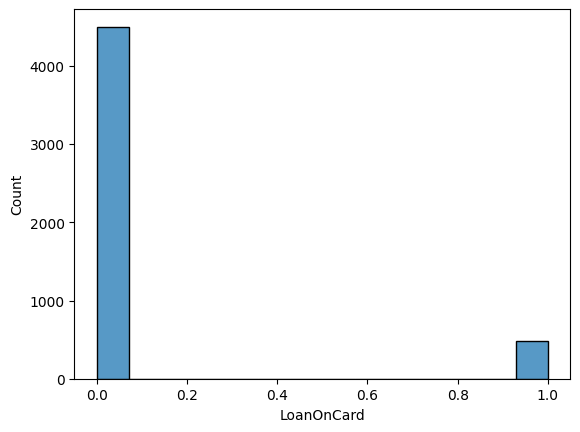

In [ ]:
sns.histplot(data=result, x='LoanOnCard');

1. Only 1% of the cutomers has the loan on the card where 99% of the customers doesn't have any loan on the card
2. The number of customers having the loan on card is very much lesser than the customers having no loan on the credit card


###Part 2.2 b - Check the percentage of missing values and impute if required

In [ ]:
result.isna().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

###Part 2.2 c - Check for unexpected values in each categorical variable and impute with best suitable value

In [ ]:
result = result.dropna(axis=0)
result['LoanOnCard'].isna().sum()

0

##Part 2.3

###Part 2.3 a- Split data into X and Y 

In [ ]:
x = result.drop(['LoanOnCard'],axis=1)
y = result['LoanOnCard']

###Part 2.3 b - Split data into train and test. Keep 25% data reserved for testing

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)

###Part 2.3 c - Train a Supervised Learning Classification base model - Logistic Regression

In [ ]:
model = LogisticRegression(solver = 'liblinear')
model.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [ ]:
y_predict = model.predict(x_test)
y_predict

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
model_score = model.score(x_test,y_test)
print('score : {:.3f}'.format(model_score))
f1 = f1_score(y_test,y_predict)
print('F1 score: {:.3f}'.format(f1))

score : 0.906
F1 score: 0.412


###Part 2.3 d - Print evaluation metrics for the model and clearly share insights

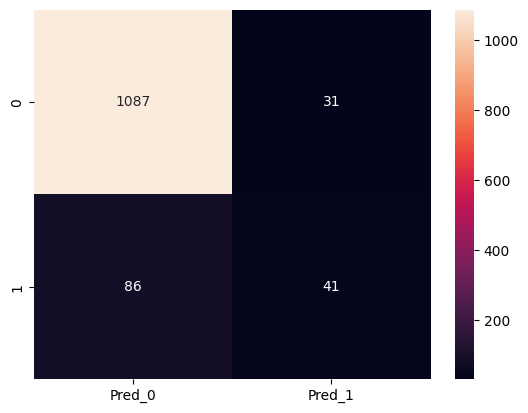

In [ ]:
cm = metrics.confusion_matrix(y_test,y_predict,labels = [0,1])
df_cm = pd.DataFrame(cm,index = [ i for i in [0,1]],columns=[ i for i in ['Pred_0','Pred_1']])
sns.heatmap(df_cm,annot=True,fmt='g');

###Part 2.3 e - Balance the data using the right balancing technique

In [ ]:
result.LoanOnCard.value_counts()

0.0    4500
1.0     480
Name: LoanOnCard, dtype: int64

In [ ]:
#create two different dataframe of majority and minority class 
df_majority = result[(result['LoanOnCard']==0)] 
df_minority = result[(result['LoanOnCard']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 4500, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [ ]:
df_upsampled.LoanOnCard.value_counts()

1.0    4500
0.0    4500
Name: LoanOnCard, dtype: int64

###Part 2.3 f- Again train the same previous model on balanced data

In [ ]:
x = df_upsampled.drop(['LoanOnCard'],axis=1)
y = df_upsampled['LoanOnCard']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)
model = LogisticRegression(solver = 'liblinear')
model.fit(x_train,y_train)
y_predict = model.predict(x_test)

###Part 2.3 g- Print evaluation metrics and clearly share differences observed 

In [ ]:
model_score = model.score(x_test,y_test)
print('score : {:.3f}'.format(model_score))
f1 = f1_score(y_test,y_predict)
print('F1 score: {:.3f}'.format(f1))

score : 0.899
F1 score: 0.899


Scores are negligibly reduced after resampling. The F1 score is dramatically increased

##Part 2.4

###Part 2.4 a- Train a base model each for SVM, KNN

In [ ]:
clf_svm = SVC()
clf_svm.fit(x_train, y_train)
y_pred = clf_svm.predict(x_test)
score = clf_svm.score(x_test,y_test)
print('SVM Accuracy: {:.3f}'.format(score))

clf_knn = KNeighborsClassifier()
clf_knn.fit(x_train, y_train)
y_pred = clf_knn.predict(x_test)
score=clf_knn.score(x_test,y_test)
print("KNN Accuracy: {:.3f}".format(score))

SVM Accuracy: 0.496
KNN Accuracy: 0.900


###Part 2.4 b - Tune parameters for each of the models wherever required and finalize a mode 